<a href="https://colab.research.google.com/github/Luciahelenasantos/POS_GRADUACAO_PUC/blob/main/Visualizacao_Informacao/Exerc%C3%ADcio_Visualiza%C3%A7%C3%A3o_de_dados_Gr%C3%A1fico_de_linhas_do_crescimento_da_popula%C3%A7%C3%A3o_brasileira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##OK Carrega bibliotecas utilizadas

import pandas as pd
import matplotlib.pyplot as plt

## Carrega e trata dados

In [ ]:
## Carrega dados
pop_br = pd.read_csv('https://sidra.ibge.gov.br/geratabela?format=br.csv&name=tabela1286.csv&terr=N&rank=-&query=t/1286/n2/all/v/606/p/all/l/v,p,t', on_bad_lines='skip', skiprows=3, nrows=5, delimiter=';')

# use first column as index
pop_br = pop_br.set_index('Grande Região')

# adjust scale (in millions)
pop_br = pop_br.astype(float) / 1000000

pop_br

,1872,1890,1900,1920,1940,1950,1960,1970,1980,1991,2000,2010
Grande Região,,,,,,,,,,,,
Norte,0.332847,0.476370,0.695112,1.439052,1.627608,2.048696,2.930005,4.188313,6.767249,10.257266,12.893561,15.864454
Nordeste,4.638560,6.002047,6.749507,11.245921,14.434080,17.973413,22.428873,28.675110,35.419156,42.470225,47.693253,53.081950
Sudeste,4.016922,6.104384,7.824011,13.654934,18.345831,22.548494,31.062978,40.331969,52.580527,62.660700,72.297351,80.364410
Sul,0.721337,1.430715,1.796495,3.537167,5.735305,7.840870,11.892107,16.683551,19.380126,22.117026,25.089783,27.386891
Centro-Oeste,0.220812,0.320399,0.373309,0.758531,1.093491,1.532924,2.678380,4.629640,7.003515,9.412242,11.616745,14.058094


In [ ]:
#Transforma índice em coluna
pop1 = pop_br.reset_index()

#Altera o nome da nova coluna
pop_br = pop1.rename(columns={"Grande Região":"regiao"})

pop_br

,regiao,1872,1890,1900,1920,1940,1950,1960,1970,1980,1991,2000,2010
0,Norte,0.332847,0.476370,0.695112,1.439052,1.627608,2.048696,2.930005,4.188313,6.767249,10.257266,12.893561,15.864454
1,Nordeste,4.638560,6.002047,6.749507,11.245921,14.434080,17.973413,22.428873,28.675110,35.419156,42.470225,47.693253,53.081950
2,Sudeste,4.016922,6.104384,7.824011,13.654934,18.345831,22.548494,31.062978,40.331969,52.580527,62.660700,72.297351,80.364410
3,Sul,0.721337,1.430715,1.796495,3.537167,5.735305,7.840870,11.892107,16.683551,19.380126,22.117026,25.089783,27.386891
4,Centro-Oeste,0.220812,0.320399,0.373309,0.758531,1.093491,1.532924,2.678380,4.629640,7.003515,9.412242,11.616745,14.058094


In [ ]:
# Reformata o dataframe para o formato longo, criando uma coluna Year (ano)
pop_br_long = pd.melt(pop_br, id_vars = ["regiao"],
                      var_name = "ano",
                      value_name = "Value")

pop_br_long

,regiao,ano,Value
0,Norte,1872,0.332847
1,Nordeste,1872,4.638560
2,Sudeste,1872,4.016922
3,Sul,1872,0.721337
4,Centro-Oeste,1872,0.220812
5,Norte,1890,0.476370
6,Nordeste,1890,6.002047
7,Sudeste,1890,6.104384
8,Sul,1890,1.430715
9,Centro-Oeste,1890,0.320399


## Gráfico de linha

In [ ]:
# alternativa A: definição manual das cores a partir de lista de cores em hex
coresViridis = ["#440154","#2F4F4F","#FFD700","#C71585","#FF0000","#BC8F8F"]

# define uma cor default
corDefault = coresViridis[1]

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#000000", lw=0.1)


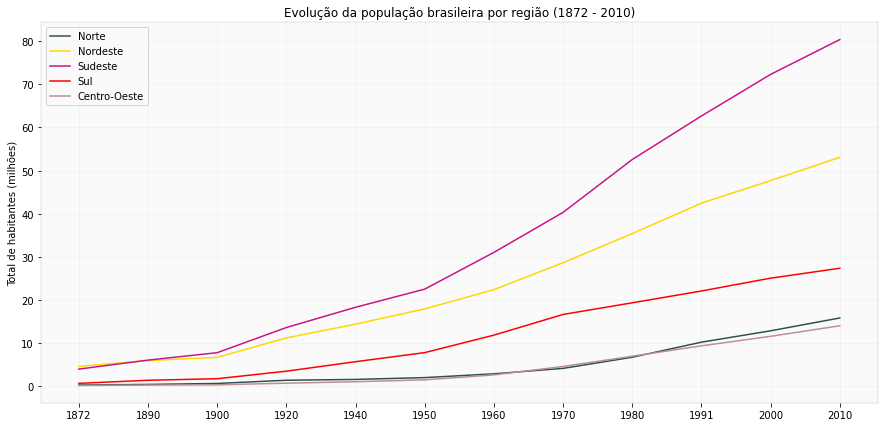

In [ ]:
# Cria dataframe para cada região
pop_br_norte = pop_br_long[pop_br_long['regiao'] == 'Norte'].copy()
pop_br_nordeste = pop_br_long[pop_br_long['regiao'] == 'Nordeste'].copy()
pop_br_sudeste = pop_br_long[pop_br_long['regiao'] == 'Sudeste'].copy()
pop_br_sul = pop_br_long[pop_br_long['regiao'] == 'Sul'].copy()
pop_br_centrooeste = pop_br_long[pop_br_long['regiao'] == 'Centro-Oeste'].copy()

# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 5
fig, ax = plt.subplots(figsize = (15,7))

# Acrescenta um título ao gráfico
ax.set_title('Evolução da população brasileira por região (1872 - 2010)')

# Define os rótulos dos eixos
# ax.set_xlabel('ano')
ax.set_ylabel('Total de habitantes (milhões)') 

# Plota o gráfico de linha
ax.plot(pop_br_norte['ano'], pop_br_norte['Value'],color = coresViridis[1], label = 'Norte')
ax.plot(pop_br_nordeste['ano'], pop_br_nordeste['Value'],color = coresViridis[2], label = 'Nordeste')
ax.plot(pop_br_sudeste['ano'], pop_br_sudeste['Value'],color = coresViridis[3], label = 'Sudeste')
ax.plot(pop_br_sul['ano'], pop_br_sul['Value'],color = coresViridis[4], label = 'Sul')
ax.plot(pop_br_centrooeste['ano'], pop_br_centrooeste['Value'],color = coresViridis[5], label = 'Centro-Oeste')

# Acrescenta legenda
plt.legend()